In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.sample(n=5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
217,0.5,0.5,0.5,0.5,0.5,0.5,non-bankruptcy
136,1.0,0.0,1.0,1.0,1.0,1.0,non-bankruptcy
64,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
116,0.0,0.0,0.5,0.5,1.0,0.0,non-bankruptcy
27,0.0,0.0,0.0,0.0,0.0,1.0,bankruptcy


In [3]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
nrows, ncols = df.shape
print(f"There are {nrows} rows and {ncols} columns")

There are 250 rows and 7 columns


In [6]:
df['class'].unique()

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])

The Output 0 = bankruptcy, 1 = non-bankruptcy

Now all the data is numeric

In [8]:
df.sample(n=5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
17,0.5,0.5,0.0,0.0,0.0,0.0,0
171,0.0,1.0,0.0,1.0,1.0,0.5,1
209,0.0,0.0,0.5,1.0,1.0,1.0,1
112,0.5,0.5,1.0,1.0,1.0,0.5,1
189,0.5,0.0,1.0,1.0,1.0,0.0,1


# EDA

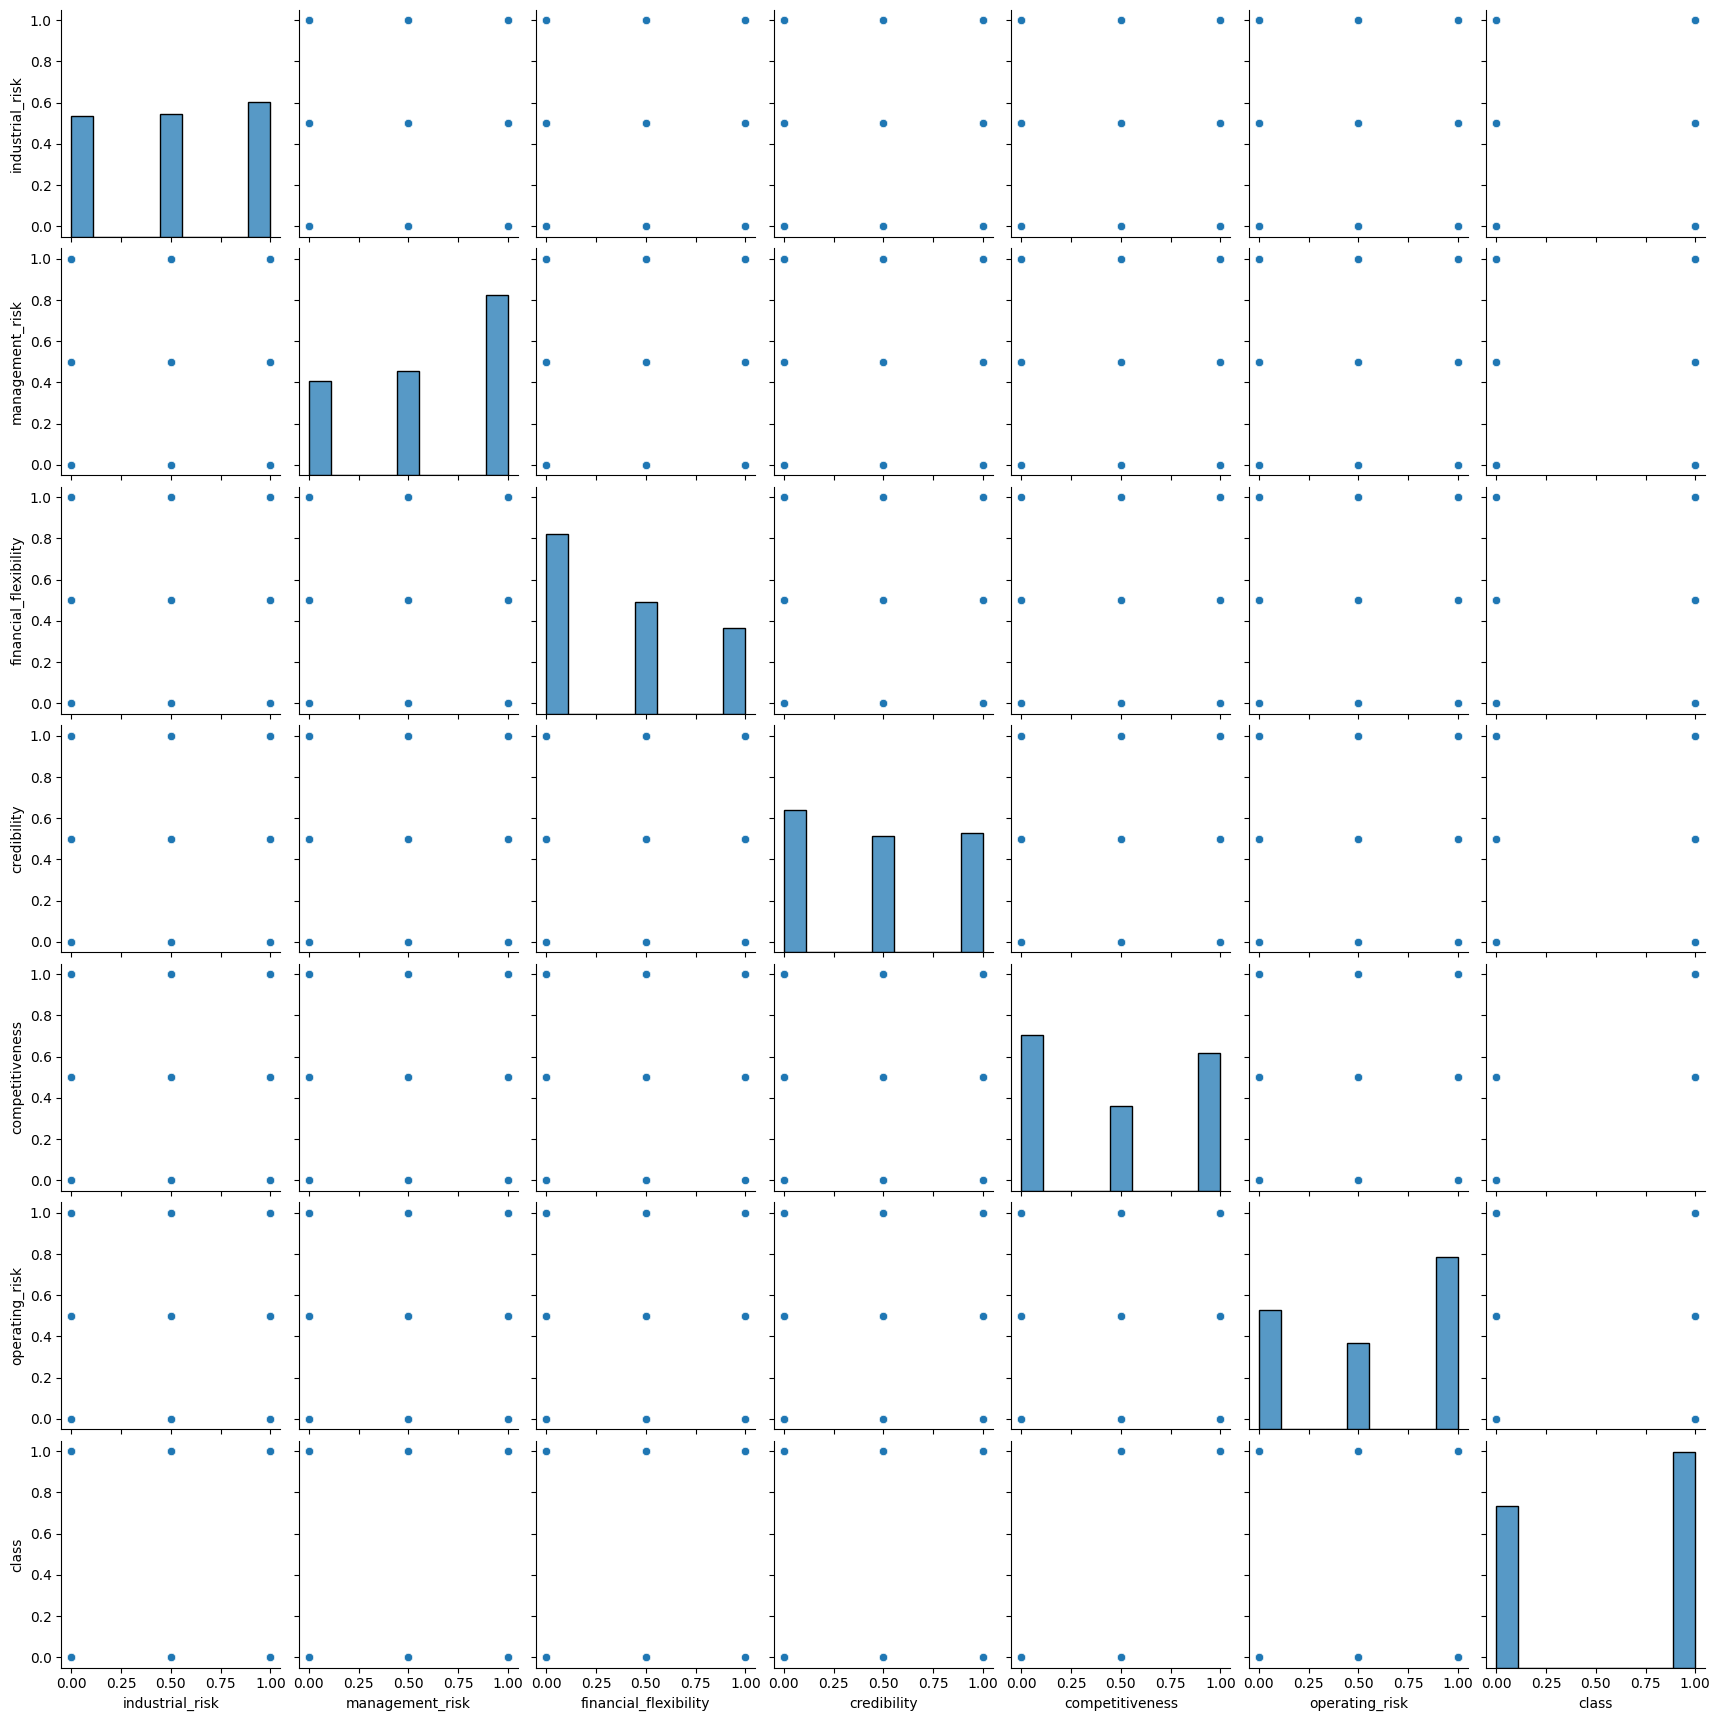

In [9]:
import seaborn as sns

sns.pairplot(df)

<AxesSubplot:>

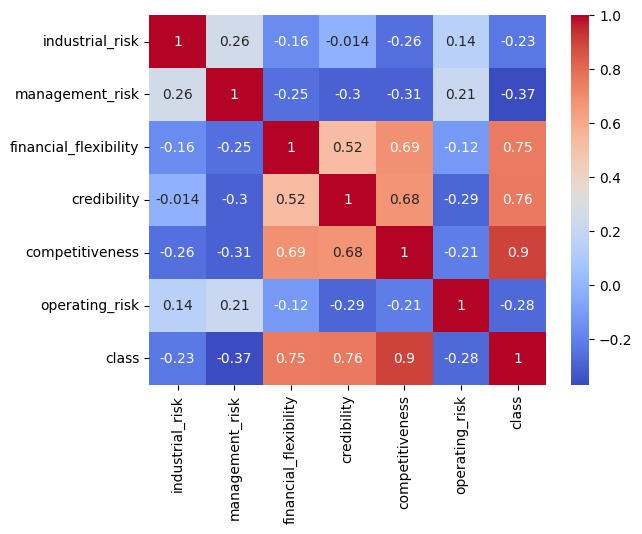

In [10]:
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")

In [11]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:6]
Y = df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Training the model

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

RF = RandomForestClassifier(n_estimators=10, random_state=0)
RF.fit(X_train, Y_train)

predicted_values = RF.predict(X_test)

x = accuracy_score(Y_test, predicted_values) * 100

print(f"RF's Accuracy is: {x}%")
print(classification_report(Y_test,predicted_values))

RF's Accuracy is: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        26

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [13]:
importances = RF.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 4 (0.475819)
2. feature 2 (0.385863)
3. feature 3 (0.101118)
4. feature 5 (0.018284)
5. feature 1 (0.010977)
6. feature 0 (0.007939)


# financial_flexibility, credibility, competitiveness has good relationship with the target 

In [14]:
import pickle

RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)

RF_Model_pkl.close()

In [15]:
a = 0
b = 0
c = 0.5
d = 0.5
e = 0
f = 1


data = np.array([[a,b,c,d,e,f]])
prediction = RF.predict(data)
print(prediction)

[0]


C:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
predicted_probs = RF.predict_proba([[a,b,c,d,e,f]])

print(predicted_probs)

[[0.6 0.4]]


C:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy * 100)

Accuracy: 100.0


In [23]:
from sklearn.neighbors import KNeighborsClassifier

k = 2  # number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, Y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy * 100)

Accuracy: 100.0


In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, Y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy * 100)

Accuracy: 100.0


# All the models got an accuracy of 100%. We choosed Randomforest as final model 